In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.8 MB 871.5 kB/s eta 0:00:45
   ---------------------------------------- 0.1/38.8 MB 726.2 kB/s eta 0:00:54
   ---------------------------------------- 0.1/38.8 MB 722.1 kB/s eta 0:00:54
   ---------------------------------------- 0.2/38.8 MB 701.4 kB/s eta 0:00:56
   ---------------------------------------- 0.2/38.8 MB 615.9 kB/s eta 0:01:03
   ---------------------------------------- 0.2/38.8 MB 621.6 kB/s eta 0:01:03
   ---------------------------------------- 0.2/38.8 MB 628.1 kB/s eta 0:01:02
   ---------------------------------------- 0.2/38.8 MB 628.1 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.8 MB 610.3 kB/s eta 0:01:04
   ---------------------------------------- 0.3/38.8 MB 595.3 kB/s eta 0:01:05
   ---------------------------------------- 0.3/38.8 MB 600.2 k

In [2]:
import sys
print(sys.executable)

C:\Users\Minal\anaconda3\envs\myenv\python.exe


In [3]:
import numpy as np
import pandas as pd
import os,cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def detect_face(image_path,target_path):
    alg = "C:/Users/Minal/anaconda3/envs/myenv/Library/etc/haarcascades/haarcascade_frontalface_default.xml"
    haar_cascade = cv2.CascadeClassifier(alg)
    file_name = image_path
    img = cv2.imread(file_name,0)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    faces = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=2, minSize=(100,100))
    for x, y, w, h in faces:
        cropped_image = img[y : y + h, x: x + w]
        target_file_name = target_path
        cv2.imwrite(
            target_file_name,
            cropped_image,
        )

In [10]:
load_image_path = "C:/Users/Minal/Downloads/dataset/dataset/faces/Deepika/face_2.jpg" 
target_path = "gray.jpg"
detect_face(load_image_path, target_path)

In [4]:
data = "C:/Users/Minal/Downloads/dataset/dataset/faces/"
X=[]; Y=[]; target_names=[]
person_id = 0; h=w=300
n_samples = 0
class_names = []
for person_name in os.listdir(data):
    #print(person_name)
    dir_path = data+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path+image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        resized_image = cv2.resize(gray, (h,w))
        #convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        n_samples = n_samples+1
        Y.append(person_id)
        target_names.append(person_name)
    person_id = person_id+1
Y = np.array(Y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(X.shape, Y.shape, target_names.shape)
print('Number of samples:', n_samples)
print('Number of features:', n_features)  
print('Classes:', class_names)

(451, 270000) (451,) (451,)
Number of samples: 451
Number of features: 270000
Classes: ['Aamir', 'Ajay', 'Akshay', 'Alia', 'Amitabh', 'Deepika', 'Disha', 'Farhan', 'Ileana']


In [ ]:
data = "C:/Users/Minal/Downloads/dataset/dataset/faces/"
cap = cv2.VideoCapture(0)

X=[]; Y=[]; target_names=[]
person_id = 0; h=w=300
n_samples = 0
class_names = []
for face in os.listdir(data):
    dir_path = data+face+"/"
    known_faces = faces
    for image in os.listdir(dir_path):
        image_path = dir_path+image+"/"
        img = cv2.imread(image_path)
        img_encode = cv2.imencode('.png',img)[1]
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        resized_image = cv2.resize(gray, (h,w))
        #convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        n_samples = n_samples+1
        Y.append(person_id)
        target_names.append(face)
    person_id = person_id+1
Y = np.array(Y)
X = np.array(X)
target_names = np.array(target_names)

while True:
    ret, frame = cap.read()
    small_frame = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
    rgb_small_frame = frame[:, :, :: -1]
    face_loc = cv2.imread(rgb_small_frame)
    enc = cv2.imencode(rgb_small_frame, face_loc)
    for face_enc in enc:
        match = compare(img_encode, face_enc, cv2.CMP_EQ)

for (x, y, w, h) in faces:
        cv2.rectangle(video, (x,y), (x+w, y+h), (0,255,0), 2)
    cv2.imshow("video_live", video)
    if cv2.waitKey(10) == ord("a"):
       break
cap.release()
        

In [ ]:
pca.components_.shape

In [5]:
faces = {}
directory = "C:/Users/Minal/Downloads/dataset/dataset/faces/"  # Replace with your directory path
for root, _, files in os.walk(directory):
    for filename in files: 
        if not (filename.endswith(".jpg") or filename.endswith(".jpeg")): 
            continue  

        filepath = os.path.join(root, filename)
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
        if image is not None: 
            faces[filename] = image
        else: 
            print(f"Error: Could not read {filename}")

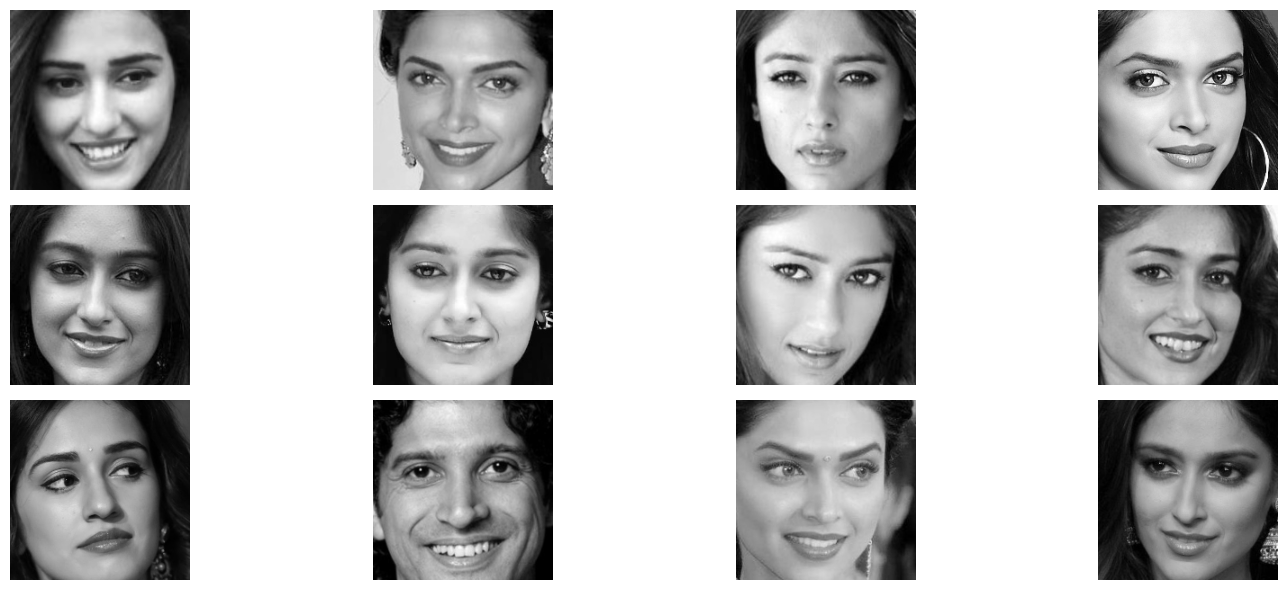

In [6]:
faceimages = list(faces.values())[12:]# Load your numpy array of face images



width = 200
height = 200

# Create a subplot grid with 3 rows and 4 columns
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(16, 6))

# Plot each image in the grid
for i in range(12):  # Loop through the first 12 images in `faceimages`
    resized_image = cv2.resize(faceimages[i], (width, height))
    axes[i // 4, i % 4].imshow(resized_image, cmap="gray")
    axes[i // 4, i % 4].axis('off')  # Turn off axis labels for clarity
    
    # Add label as title to each subplot (replace `labels[i]` with your actual label data)
    

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

(265, 90000)
(265,)
Shape of pca.components_: (150, 90000)


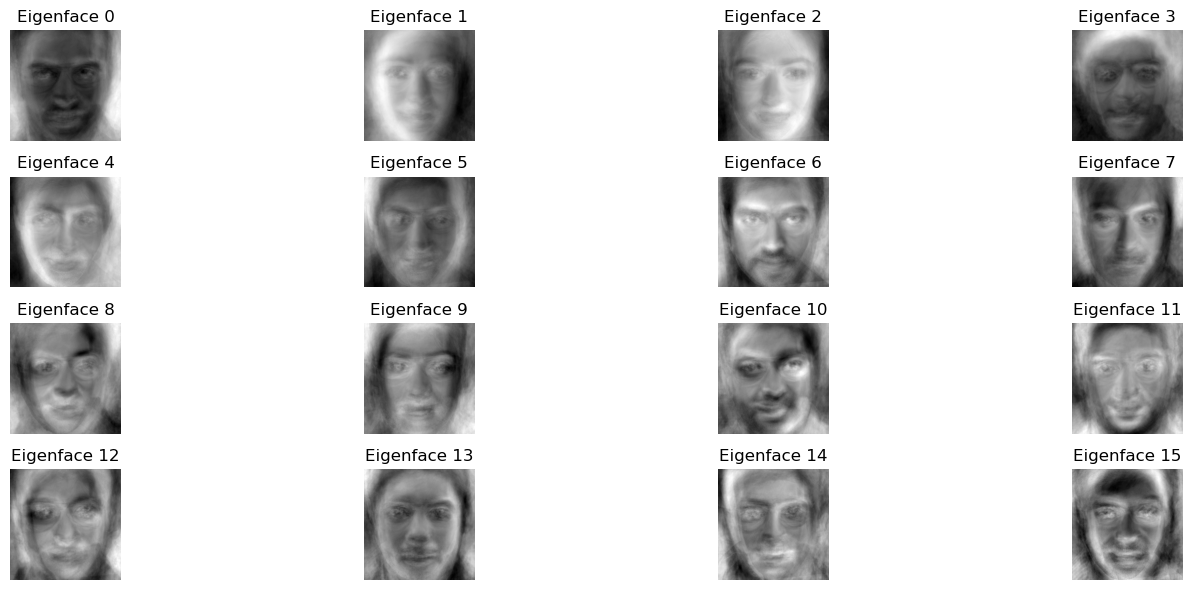

(265, 150) (178, 150)
Shape of transformed data (LDA): (265, 8) (178, 8)


In [8]:
directory = "C:/Users/Minal/Downloads/dataset/dataset/faces/"

# List to store flattened images
faces = []
labels = []
# Iterate through directory to load and flatten images
for root, _, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                h, w = 300, 300
                image = cv2.resize(image, (w, h))
                faces.append(image.flatten())
                labels.append((os.path.basename(root))) 

# Convert faces list to numpy array
faces = np.array(faces)
labels = np.array(labels)
# Perform PCA
n_components = 150

X_train, X_test, Y_train, Y_test = train_test_split(faces, labels, test_size=0.40, random_state=42)
print(X_train.shape)
print(Y_train.shape)

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(faces)

# Check the shape of pca.components_
print("Shape of pca.components_:", pca.components_.shape)

# Get original image dimensions
h, w = image.shape[:2]  # Assuming all images are of the same size after loading and preprocessing

# Reshape eigenfaces for visualization
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plotting setup
plt.figure(figsize=(16, 6))
for i in range(min(16, n_components)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"Eigenface {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)
#compute fisherface
lda = LinearDiscriminantAnalysis()
#compute LDA of reduced data
lda.fit(X_train_pca, Y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Shape of transformed data (LDA):", X_train_lda.shape, X_test_lda.shape)

In [9]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda, Y_train)
print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.42299297
Iteration 2, loss = 3.35642556
Iteration 3, loss = 3.29360290
Iteration 4, loss = 3.23136221
Iteration 5, loss = 3.17280309
Iteration 6, loss = 3.11431816
Iteration 7, loss = 3.05915130
Iteration 8, loss = 3.00594785
Iteration 9, loss = 2.95241482
Iteration 10, loss = 2.90254587
Iteration 11, loss = 2.85398633
Iteration 12, loss = 2.80704465
Iteration 13, loss = 2.76173776
Iteration 14, loss = 2.71731994
Iteration 15, loss = 2.67404264
Iteration 16, loss = 2.63320267
Iteration 17, loss = 2.59306509
Iteration 18, loss = 2.55413998
Iteration 19, loss = 2.51697600
Iteration 20, loss = 2.48016088
Iteration 21, loss = 2.44446050
Iteration 22, loss = 2.41036039
Iteration 23, loss = 2.37755111
Iteration 24, loss = 2.34571590
Iteration 25, loss = 2.31429218
Iteration 26, loss = 2.28583087
Iteration 27, loss = 2.25677442
Iteration 28, loss = 2.22903287
Iteration 29, loss = 2.20186323
Iteration 30, loss = 2.17559038
Iteration 31, loss = 2.14973839
Iteration 32, los

In [10]:
import joblib

# save
joblib.dump(clf, "model.pkl") 

# load
clf2 = joblib.load("model.pkl")

Disha 6
Akshay 2
Ajay 8
Farhan 0
Ajay 1
Disha 6
Ileana 3
Amitabh 4
Akshay 8
Ileana 8
Ileana 8
Ajay 1
Ileana 3
Farhan 7
Ileana 3
Ileana 3
Farhan 7
Akshay 2
Ajay 1
Ileana 8
Aamir 0
Amitabh 4
Ajay 1
Ileana 8
Aamir 3
Deepika 5
Disha 3
Amitabh 4
Ileana 3
Akshay 0
Ileana 8
Ajay 0
Aamir 7
Akshay 2
Disha 6
Deepika 8
Ajay 2
Farhan 7
Ileana 8
Deepika 0
Ajay 0
Alia 3
Disha 6
Alia 5
Amitabh 4
Ajay 0
Ajay 1
Aamir 8
Disha 6
Disha 6
Deepika 5
Akshay 0
Aamir 0
Farhan 7
Aamir 1
Ileana 8
Akshay 0
Aamir 1
Aamir 0
Deepika 5
Ileana 3
Ajay 2
Farhan 0
Ileana 8
Amitabh 4
Disha 8
Alia 6
Farhan 7
Farhan 7
Aamir 1
Amitabh 4
Alia 6
Deepika 0
Aamir 2
Alia 3
Farhan 7
Akshay 2
Disha 6
Amitabh 4
Deepika 6
Aamir 4
Aamir 1
Ajay 1
Farhan 7
Akshay 2
Ajay 1
Ajay 2
Alia 3
Aamir 0
Aamir 0
Ajay 1
Deepika 7
Deepika 0
Aamir 0
Ajay 1
Disha 6
Deepika 0
Alia 8
Ileana 3
Ajay 1
Amitabh 2
Farhan 7
Ileana 8
Amitabh 4
Ileana 8
Akshay 2
Alia 8
Aamir 3
Aamir 1
Alia 3
Alia 5
Farhan 7
Farhan 7
Aamir 0
Ileana 8
Disha 5
Disha 4
Aamir 8
Aami

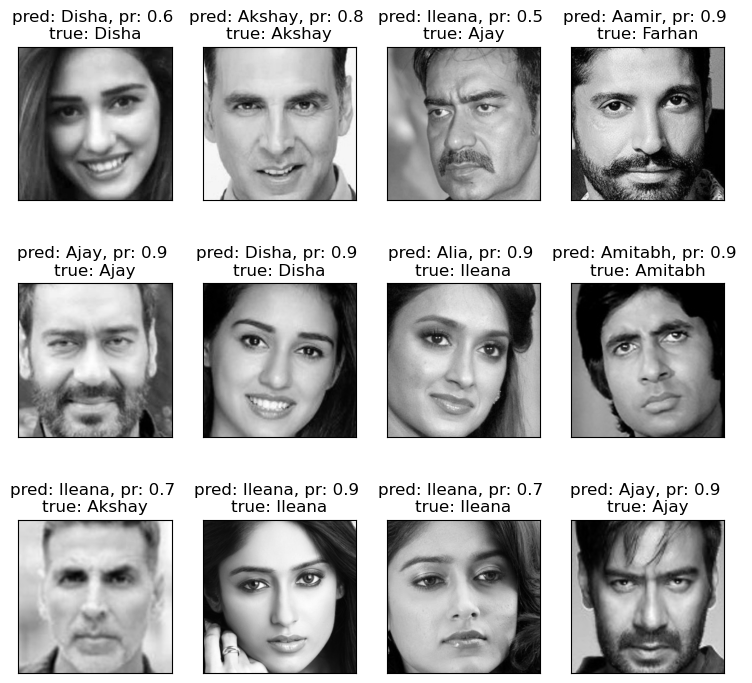

In [11]:
class_names = ['Aamir', 'Ajay', 'Akshay', 'Alia', 'Amitabh', 'Deepika', 'Disha', 'Farhan', 'Ileana']
class_id_to_name = {i: name for i, name in enumerate(class_names)}
Y_pred=[];Y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    #print(prob,np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    #print(class_index)
    #find the label of the matched face
    Y_pred.append(class_id)
    Y_prob.append(np.max(prob))
#transform the data
Y_pred = np.array(Y_pred)


prediction_titles=[]
true_positive = 0
for i in range(Y_pred.shape[0]):
    print(Y_test[i], Y_pred[i])
    name_number = Y_test[i].strip().rsplit(' ', 1)
    true_name = name_number[0]
    pred_name = class_id_to_name[Y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(Y_prob[i])[:3], true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

print("Accuracy:", true_positive*100/Y_pred.shape[0])
rows=3;col=4
plt.figure(figsize=(1.8*col, 2.4*rows))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i].reshape(300,300), cmap='gray')
    
    plt.title(prediction_titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [24]:

Y_test_int = np.array([6, 4, 4, 0, 3, 6, 3, 4, 2, 8, 3, 1, 3, 7, 6, 3, 6, 3, 1, 8, 0, 4, 1, 8, 1, 5, 4, 4, 3, 2, 8, 8, 7, 0, 6, 5, 1, 7, 8, 8, 7, 3, 6, 8, 6, 4, 5, 1, 3, 6, 6, 6, 7, 0, 7, 5, 8, 5, 1, 0, 5, 8, 0, 7, 0, 4, 6])
Y_pred = np.array([6, 4, 4, 0, 3, 6, 3, 4, 2, 8, 3, 1, 3, 7, 6, 3, 6, 3, 1, 8, 0, 4, 1, 8, 1, 5, 4, 4, 3, 2, 8, 8, 7, 0, 6, 5, 1, 7, 8, 8, 7, 3, 6, 8, 6, 4, 5, 1, 3, 6, 6, 6, 7, 0, 7, 5, 8, 5, 1, 0, 5, 8, 0, 7, 0, 4, 6])

# Example class_names
class_names = ['Amir', 'Amitabh', 'Disha', 'Akshay', 'Ajay', 'Farhan', 'Ileana', 'Deepika']
target_names = class_names
# Ensure unique classes and their count
unique_classes = np.unique(np.concatenate((Y_test_int, Y_pred)))
num_classes = len(unique_classes)
print(f'Number of unique classes: {num_classes}')

# Generate classification report with labels parameter
print('Classification Report:')
print(classification_report(Y_test_int, Y_pred, target_names=target_names, labels=unique_classes))

# Generate a confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test_int, Y_pred))

k_values = range(1, 10)  # Example range of k values
accuracy_scores = []



Number of unique classes: 9
Classification Report:
              precision    recall  f1-score   support

        Amir       1.00      1.00      1.00         7
     Amitabh       1.00      1.00      1.00         7
       Disha       1.00      1.00      1.00         2
      Akshay       1.00      1.00      1.00         9
        Ajay       1.00      1.00      1.00         8
      Farhan       1.00      1.00      1.00         6
      Ileana       1.00      1.00      1.00        11
     Deepika       1.00      1.00      1.00         7

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
[[ 7  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0 10]]


C:\Users\Minal\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:2148: UserWarning: labels size, 9, does not match size of target_names, 8
  warnings.warn(


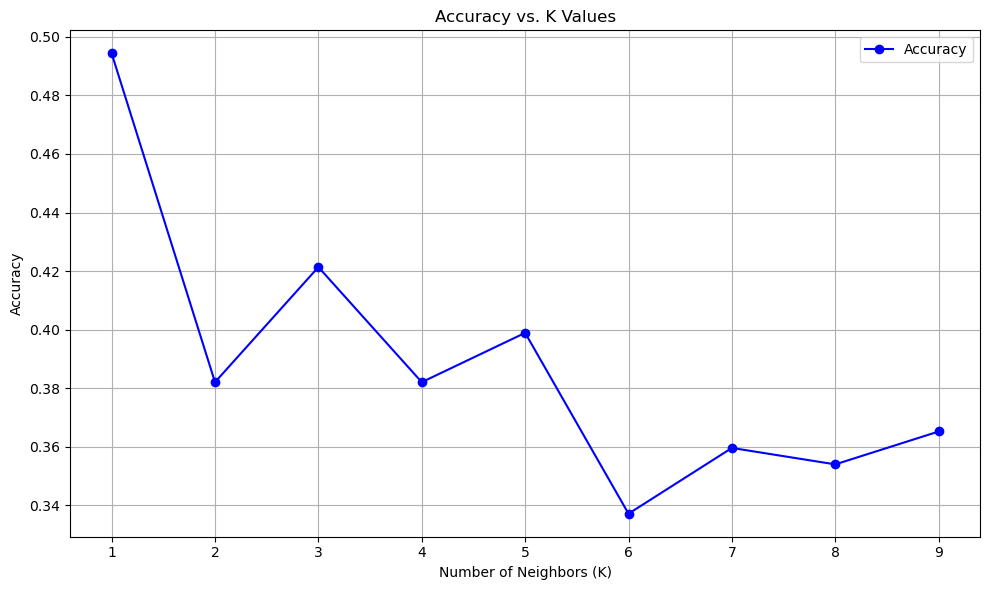

In [20]:
k_values = range(1, 10)  # Testing k values from 1 to 20

# List to store accuracy for each k
accuracies = []

# Iterate over each k value
for k in k_values:
    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    # Predict on test set
    Y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy vs. K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
pca = PCA(n_components=8)
pca.fit(X_train)
def detect_faces(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    return faces

def recognize_faces(test_image_paths):
    predicted_labels = []
    
    for image_path in test_image_paths:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        faces = detect_faces(gray)
        if len(faces) == 0:
            print("No faces detected in image:", image_path)
            continue
        for (x, y, w, h) in faces:
            face_roi = gray[y:y+h, x:x+w]
            face_roi_resized = cv2.resize(face_roi, (100, 100))  # Resize to a fixed size
            
            # Flatten and normalize the resized face image
            face_vector = face_roi_resized.flatten() / 255.0
            
            # Ensure `face_vector` matches the input size expected by PCA
            if face_vector.shape[0]!= pca.components_.shape[1]:
                continue  # Skip if dimensions don't match
            
            # Transform using PCA to reduce dimensionality to 8 features
            face_pca = pca.transform([face_vector])[:, :8]
            
            # Predict label using the MLPClassifier
            predicted_label = clf.predict(face_pca)[0]
            predicted_labels.append(predicted_label)
            
            # Draw rectangle and label on the face
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(img, str(predicted_label), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        
        # Display the image with rectangles and labels
        cv2.imshow('Recognized Faces', img)
        cv2.waitKey(0)
    
    cv2.destroyAllWindows()
    
    return predicted_labels

In [13]:
test_image_paths = ["C:/Users/Minal/Downloads/dataset/dataset/faces/Deepika/face_5.jpg", "C:/Users/Minal/Downloads/dataset/dataset/faces/Ileana/face_7.jpg"]
predicted_labels = recognize_faces(test_image_paths)

# Print predicted labels
print(f"Predicted labels: {predicted_labels}")

Predicted labels: []


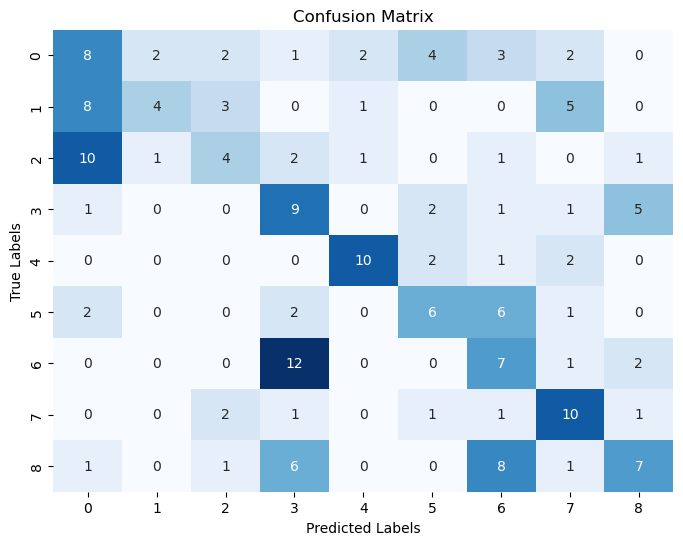

In [30]:
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()